In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 256, in start
    self.subapp.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 716, in start
    self.install_extensions()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 695, in install_extensions
    **kwargs
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 21

In [3]:
file = open('/content/word_cloud text file.txt','r')
file_contents = file.read()

In [4]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    new_file_contents = "".join((char if char.isalpha() else " ") for char in file_contents).lower().split()
    filter  = [word for word in new_file_contents if word not in list(punctuations) + uninteresting_words]
    frequencies = {word: file_contents.count(word) for word in filter}
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

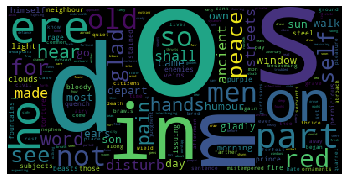

In [5]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()